In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import sketch 
import warnings
warnings.filterwarnings("ignore")

In [94]:
# Data collection and Analysis

In [95]:
data=pd.read_csv("diabetes.csv")

In [96]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
data.shape

(768, 9)

In [98]:
sns.boxplot(data.Pregnancies)

<AxesSubplot:xlabel='Pregnancies'>

In [99]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


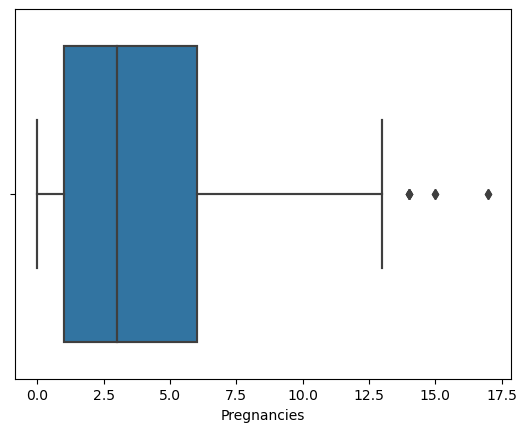

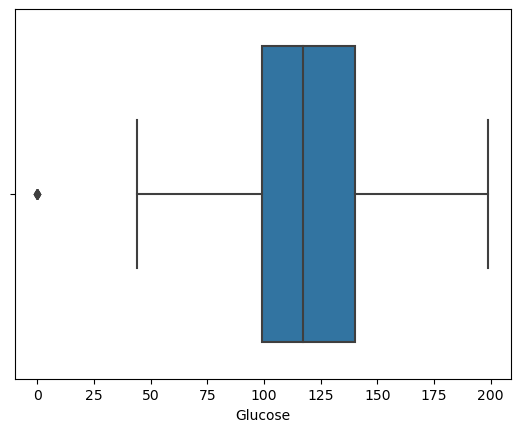

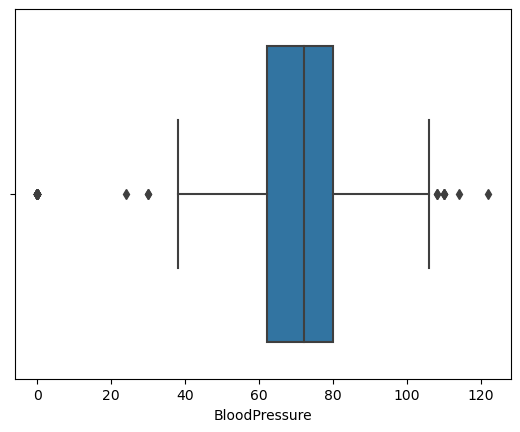

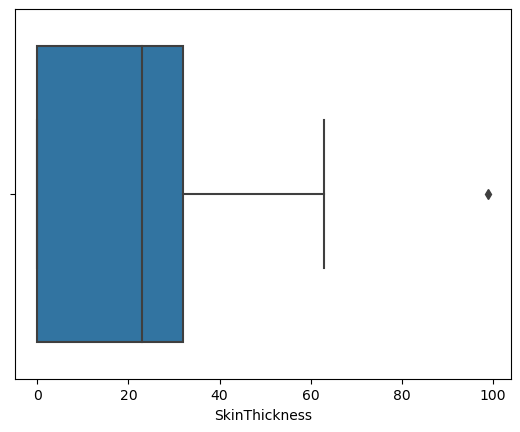

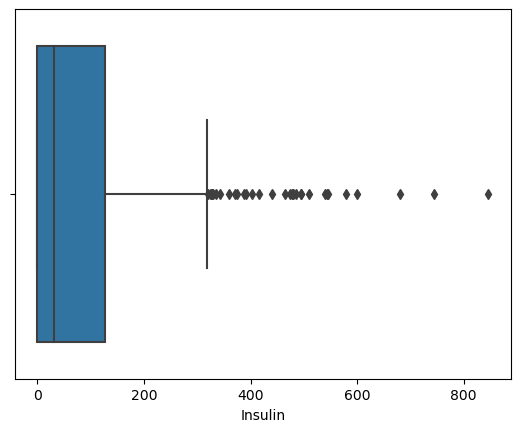

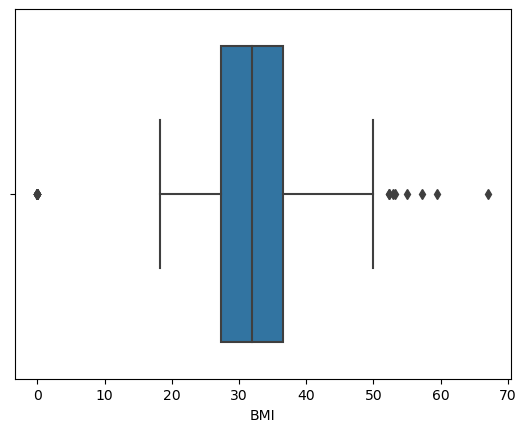

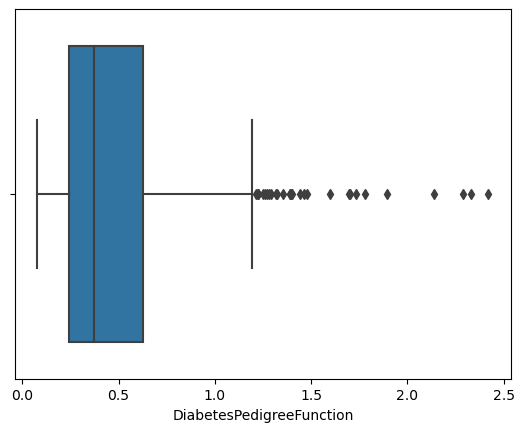

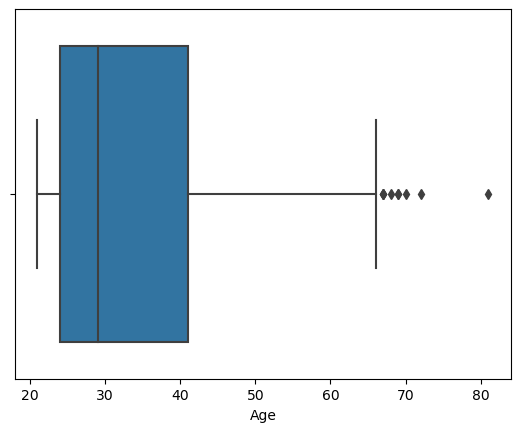

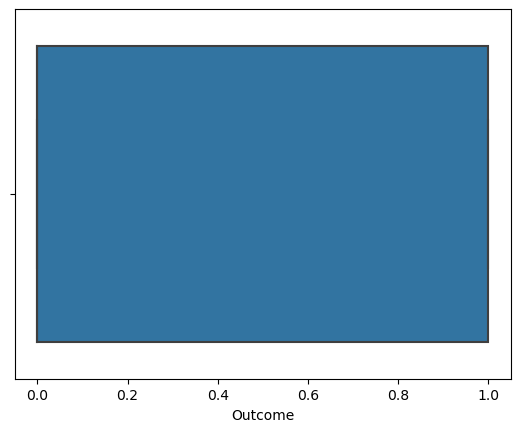

In [101]:
for col in data.columns:
    sns.boxplot(data[col])
    plt.show()

In [102]:
data.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [103]:
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1 

# Remove outliers 
data = data[~((data['Glucose'] < (Q1 - 1.5 * IQR)) |(data['Glucose'] > (Q3 + 1.5 * IQR)))]

In [104]:
data.shape

(763, 9)

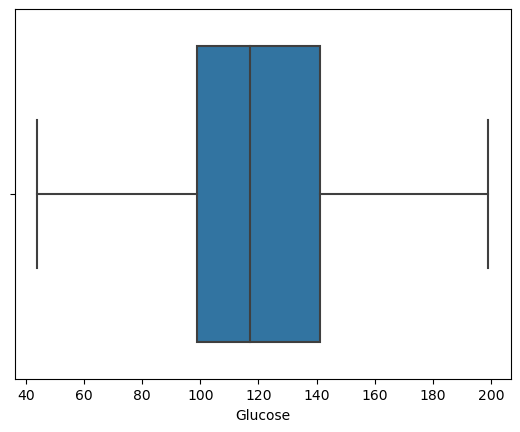

In [105]:
sns.boxplot(data.Glucose)
plt.show()

In [106]:
Q1 = data['SkinThickness'].quantile(0.25)
Q3 = data['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1 

# Remove outliers 
data = data[~((data['SkinThickness'] < (Q1 - 1.5 * IQR)) |(data['SkinThickness'] > (Q3 + 1.5 * IQR)))]

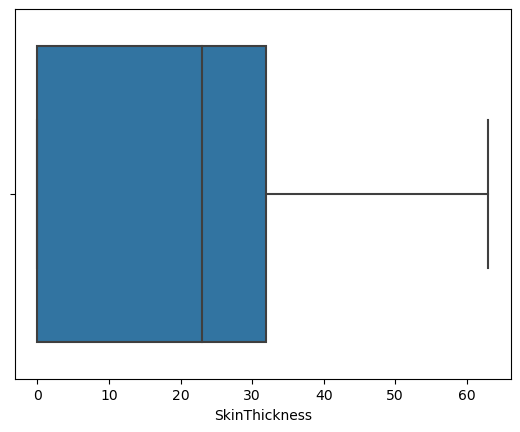

In [107]:
sns.boxplot(data.SkinThickness)
plt.show()

In [108]:
data.shape

(762, 9)

In [109]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.871698,142.113208,70.803774,21.766038,101.471698,35.107547,0.550513,36.958491


In [110]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
for i in data.columns:
    print(i,data[i].unique())
    print('-----------------------------------------------------')

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
-----------------------------------------------------
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79  62 131 112 113  74  83 136  80 123  81 134 142 144  93 163
 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153 188
 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193 191
 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186 198
 121  67 174 199  56 169 149  65 190]
-----------------------------------------------------
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  44  65 108  55  48 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
-----------------------------------------------------
SkinThickn

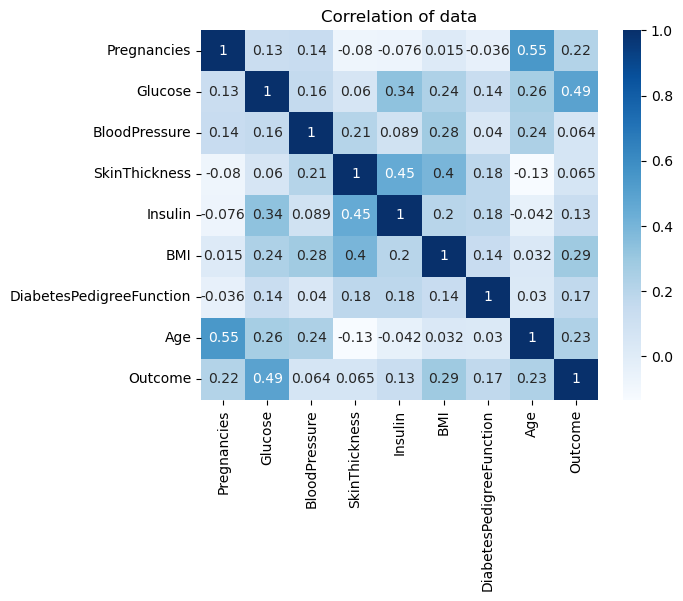

In [130]:
sns.heatmap(data = data.corr(),cmap="Blues",annot=True) 
plt.title("Correlation of data")
plt.show()

In [112]:
data.sketch.ask('how to export dataframe fil')  # ai python library for pandas